<a href="https://colab.research.google.com/github/ritesh1601/TensorFlow/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learning fundamental concepts**

*   Introduction to tensors
*   Getting information from tensors
*   Manipulating Tensors
*   Tensors and Numpy
*   Using @tf.function ( a way to speed up your regular python functions)
*   Using GPUs with TensorFlow ( or TPUs )
*   Excercise to try for yourself!


## Introduction to Tensors

In [1]:
#import tensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


In [2]:
# create tensors with tf.constant
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# check the dimension of the scalar
scalar.ndim

0

In [4]:
# create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# check the dimensions of our vector
vector.ndim

1

In [6]:
# create a matrix ( has more than 1 dimensions)
matrix = tf.constant([[2,3],[3,2]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [3, 2]], dtype=int32)>

In [7]:
# check the dimensions of the matrix
matrix.ndim

2

In [8]:
# create matrix of different data type
another_matrix=tf.constant([[2.,3.],[3.,4.],[5.,6.]],dtype=tf.float16) # specify the data type

another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[2., 3.],
       [3., 4.],
       [5., 6.]], dtype=float16)>

In [9]:
another_matrix.ndim # the number of items in the shape
# shape represents the number of rows and columns

2

In [10]:
# creating tensors
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                      [[6,5,7],
                       [12,4,6]],
                      [[13,15,6],
                       [5,5,5]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 6,  5,  7],
        [12,  4,  6]],

       [[13, 15,  6],
        [ 5,  5,  5]]], dtype=int32)>

In [11]:
tensor.ndim

3

* **Scalar :** a single number  
* **Vector :** a number with direction
* **Matrix :** a 2-dimensional array of numbers
* **Tensor :** an n-dimensional array of numbers

**Creating tensors with tf.variable**

In [12]:
changeable_Tensor = tf.Variable([10,10])
unchangeable_Tensor = tf.constant([10,10])

changeable_Tensor,unchangeable_Tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10, 10], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>)

In [13]:
# making change in the changeable tensor using .assing

changeable_Tensor[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [14]:
changeable_Tensor[0].assign(7)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [15]:
#unchangeable_Tensor[0].assign(8)

**Creating Random Tensors**

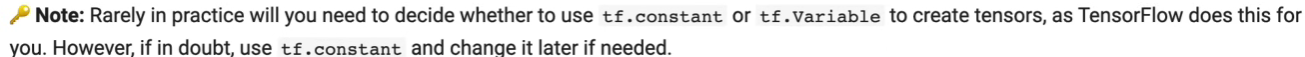

Random tensors are tensors of some arbitrary size which contain random numbers.
The random tensors are used to initialize the first value for the neural network and as the neural network gets more examples then it updates those value to get the tensor close to real answer


In [16]:
#Creating random two tensors (but the same tensors)
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducility
random_1 = random_1.normal(shape=(3,2))
random_1
random_2= tf.random.Generator.from_seed(42)
random_2= random_2.normal(shape=(3,2))
random_2

#checking are these two random tensors equal ?
random_1, random_2, random_1==random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

**Shuffle the order of the values in the tensors**
the need to shuffle the data set is to not let the neural network overfed on some data and results according to it only.


In [17]:
#shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't affect learning)
not_shuffled=tf.constant([[10,7],[2,5],[5,6]])
not_shuffled.ndim
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 5,  6]], dtype=int32)>

In [18]:
#suffle the not_shuffled tensor
tf.random.shuffle(not_shuffled)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 5,  6],
       [10,  7]], dtype=int32)>

In [19]:
tf.random.set_seed(42) #global level random seed
tf.random.shuffle(not_shuffled,seed=42) #operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 5,  6]], dtype=int32)>

In [20]:
#create a tensor of all ones
ones_array=tf.ones([4,5],dtype=tf.int32)
ones_array

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int32)>

In [21]:
#create a tensor of zeros
zeros_array=tf.zeros(shape=(4,5),dtype=tf.float64)
zeros_array

<tf.Tensor: shape=(4, 5), dtype=float64, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])>

###**Turn Numpy arrays into tensor**


---

The main difference between numpy arrays and the tensors that tensors can run on GPU (much faster)

In [22]:
#creating numpy arrays into tensors
import numpy as np
numpy_A=np.arange(1,25,dtype=np.int32) #create a Numpy array between 1 and 25
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

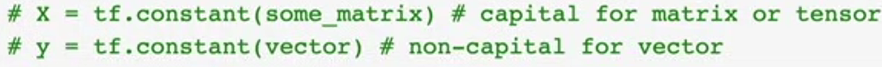

In [23]:
A=tf.constant(numpy_A)
B=tf.constant(numpy_A,shape=(3,4,2))
A,B #A is vector and B is tensor
# total number of elements in A and B should be same

(<tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>,
 <tf.Tensor: shape=(3, 4, 2), dtype=int32, numpy=
 array([[[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8]],
 
        [[ 9, 10],
         [11, 12],
         [13, 14],
         [15, 16]],
 
        [[17, 18],
         [19, 20],
         [21, 22],
         [23, 24]]], dtype=int32)>)

#Getting information from tensors

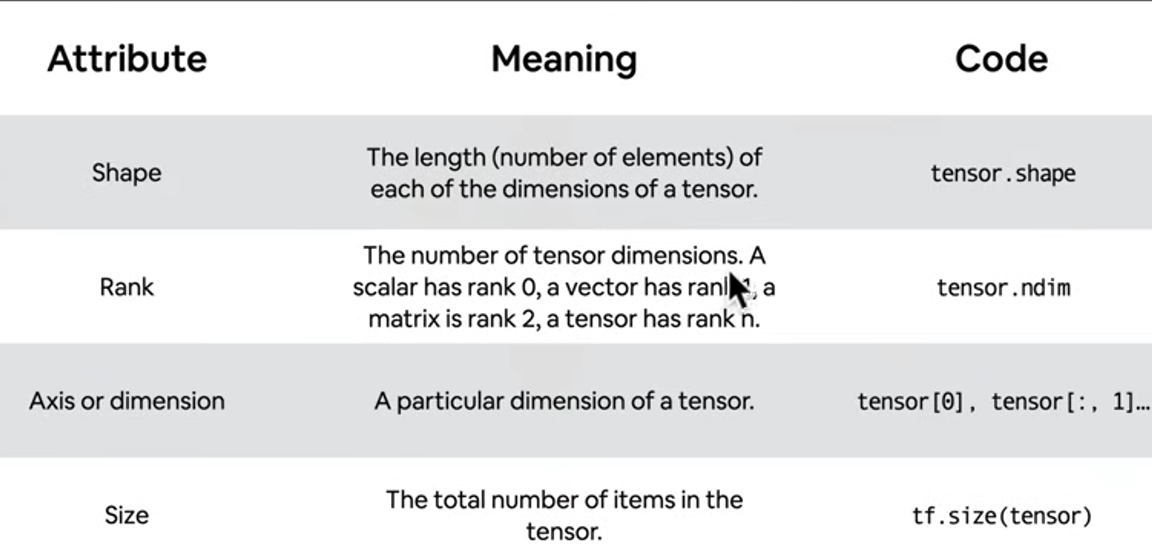

In [24]:
rank_4_tensor=tf.zeros(shape=(2,3,4,5))
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [25]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [26]:
rank_4_tensor.shape , rank_4_tensor.ndim , tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [27]:
#Getting the different attributes of a tensor

print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0])
print("Elements along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor:", tf.size(rank_4_tensor))
print("Total number of elements in our tensor:", tf.size(rank_4_tensor).numpy())

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor: 120


## Tensors Indexing
Tensors can be indexed just like python lists

In [28]:
some_list=[1,2,3,4]
some_list[:2]

[1, 2]

In [29]:
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [30]:
#Get the first element from each dimension from each index except for the final index
rank_4_tensor[:1,:1,:1,:] , rank_4_tensor[:1,:1,:1,:].numpy()

(<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>,
 array([[[[0., 0., 0., 0., 0.]]]], dtype=float32))

In [31]:
#Create a rank 2 tensor
rank_2_tensor=tf.ones(shape=(2,3))
rank_2_tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [32]:
print("size : ",tf.size(rank_2_tensor).numpy())
print("dimensions : ",rank_2_tensor.ndim)
print("shape : ",rank_2_tensor.shape)

size :  6
dimensions :  2
shape :  (2, 3)


In [33]:
#Get the last item of each row of our rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [34]:
#Add extra dimension to our rank_2_tensor
rank_3_tensor=rank_2_tensor[...,tf.newaxis]
#the above is same is rank_3_tensor=rank_2_tensor[:,:, tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 3, 1), dtype=float32, numpy=
array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]], dtype=float32)>

In [35]:
#Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor,axis=-1) # '-1' means expand the final axis

<tf.Tensor: shape=(2, 3, 1), dtype=float32, numpy=
array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]], dtype=float32)>

In [36]:
tf.expand_dims(rank_2_tensor,axis=1)


<tf.Tensor: shape=(2, 1, 3), dtype=float32, numpy=
array([[[1., 1., 1.]],

       [[1., 1., 1.]]], dtype=float32)>

In [37]:
rank_2_tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

###Manipulating tensors (Tensor Operations)
**Basic Operations**
`+`,`-`,`*`,`/`

In [38]:
#Addition operationg on tensor
tensor=tf.constant([[2,3],[4,5]])
tensor , tensor+10  , tensor#the original tensor is unchanged

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[2, 3],
        [4, 5]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[12, 13],
        [14, 15]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[2, 3],
        [4, 5]], dtype=int32)>)

In [39]:
# We can use built-in functions for these operations these are faster on large values
tf.multiply(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 30],
       [40, 50]], dtype=int32)>

In [40]:
tf.math.multiply(tensor,2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 4,  6],
       [ 8, 10]], dtype=int32)>

###Matrix Multiplication
The most common operation in machine learning
`tf.linalg.matmul` , `tf.matmul`


In [41]:
print(tensor)
print(tensor)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [42]:
tf.matmul(tensor,tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[16, 21],
       [28, 37]], dtype=int32)>

In [43]:
tensor*tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 4,  9],
       [16, 25]], dtype=int32)>

In [44]:
# Matrix Multiplication with python operator `@`
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[16, 21],
       [28, 37]], dtype=int32)>

In [45]:
X=tf.constant([[1,2],
               [3,4],
               [5,6]])
Y=tf.constant([[3,4,5],[1,2,3]])
X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[3, 4, 5],
        [1, 2, 3]], dtype=int32)>)

In [46]:
X@Y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 5,  8, 11],
       [13, 20, 27],
       [21, 32, 43]], dtype=int32)>

In [47]:
#Changing the shape of the matrix Y
Y , tf.reshape(Y,shape=(3,2)) #reshape shuffles the places of the values

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[3, 4, 5],
        [1, 2, 3]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[3, 4],
        [5, 1],
        [2, 3]], dtype=int32)>)

In [48]:
Y

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 4, 5],
       [1, 2, 3]], dtype=int32)>

In [49]:
tf.transpose(Y)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 1],
       [4, 2],
       [5, 3]], dtype=int32)>

###Matrix Multiplication is a dot product
Therefor alternate method to do matrix multiplication is `tf.tensordot()`

In [50]:
#Perform the dot product on X and Y (requires X or Y to be transposed)
X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[3, 4, 5],
        [1, 2, 3]], dtype=int32)>)

In [51]:
tf.tensordot(X,Y,axes=1,name="simple multiplication")

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 5,  8, 11],
       [13, 20, 27],
       [21, 32, 43]], dtype=int32)>

###Changing the Data-Type of a Tensor


In [52]:
A=tf.constant([1.5,2.5])
A.dtype

tf.float32

In [53]:
B=tf.constant([2,4,6])
B.dtype

tf.int32

In [54]:
#changing from float32 to float16(reduced precision)
A=tf.cast(A,dtype=tf.float16)
A,A.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.5, 2.5], dtype=float16)>,
 tf.float16)

###Aggregating Tensors
Aggregating tensors is conddensing them from multiple values down to a smaller amount of values

In [55]:
D=tf.constant([-1.7,5])

In [56]:
#get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 5. ], dtype=float32)>

`tf.math.reduce_sum()`

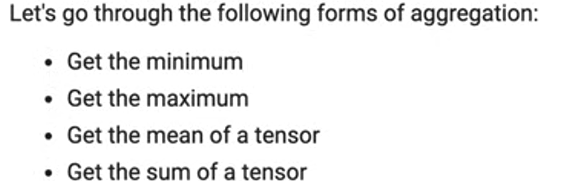

In [57]:
#create a random tensor with values between 0 to 100 of size 50
E=tf.constant(np.random.randint(0,100,size=50),dtype=tf.float32)
E

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([23., 59., 23., 46., 59.,  8., 83., 61., 70., 62.,  1.,  8., 58.,
       29., 81.,  6., 28., 30., 79.,  6., 79., 93., 72., 48., 79., 10.,
       56., 70., 45., 74., 70., 81.,  5., 65.,  2., 57., 91., 66., 46.,
       41., 32., 41.,  7., 11., 56., 70., 77., 57., 39., 34.],
      dtype=float32)>

In [58]:
tf.size(E) , E.shape , E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [59]:
#Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [60]:
#Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=float32, numpy=93.0>

In [61]:
#Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=float32, numpy=47.880001068115234>

In [62]:
#Find sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=float32, numpy=2394.0>

In [63]:
#Find the variance
tf.math.reduce_variance(E,0)

<tf.Tensor: shape=(), dtype=float32, numpy=723.5455322265625>

In [64]:
#Find the standard deviation
tf.math.reduce_std(E,0)

<tf.Tensor: shape=(), dtype=float32, numpy=26.898801803588867>

###Finding the positional maximum and minimum
How about finding the position a tensor where the maximum value occurs?

This is helpful when you want to line up your labels (say ['Green', 'Blue', 'Red']) with your prediction probabilities tensor (e.g. [0.98, 0.01, 0.01]).

In this case, the predicted label (the one with the highest prediction probability) would be 'Green'.

You can do the same for the minimum (if required) with the following:

tf.argmax() - find the position of the maximum element in a given tensor.
tf.argmin() - find the position of the minimum element in a given tensor

In [65]:
# Create a tensor with 50 values between 0 and 1
F = tf.constant(np.random.random(50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.22517498, 0.22730015, 0.90164731, 0.82193223, 0.0350259 ,
       0.35593575, 0.01939502, 0.47231129, 0.43468764, 0.15434798,
       0.05803267, 0.84813733, 0.45353764, 0.43549492, 0.51653474,
       0.72561952, 0.1875608 , 0.51480755, 0.29355162, 0.41676634,
       0.74824228, 0.54192341, 0.75704362, 0.24859047, 0.90564049,
       0.37176629, 0.55415191, 0.69972402, 0.78575708, 0.27826696,
       0.6250584 , 0.43454125, 0.00694708, 0.64296142, 0.62276798,
       0.77962562, 0.67511152, 0.9995539 , 0.16872282, 0.89233214,
       0.37287985, 0.6208507 , 0.52791648, 0.8459356 , 0.4471232 ,
       0.86822387, 0.33592014, 0.81445849, 0.70051813, 0.302847  ])>

In [66]:
# Find the maximum element position of F
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=37>

In [67]:
# Find the minimum element position of F
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=32>

In [68]:
# Find the maximum element position of F
print(f"The maximum value of F is at position: {tf.argmax(F).numpy()}")
print(f"The maximum value of F is: {tf.reduce_max(F).numpy()}")
print(f"Using tf.argmax() to index F, the maximum value of F is: {F[tf.argmax(F)].numpy()}")
print(f"Are the two max values the same (they should be)? {F[tf.argmax(F)].numpy() == tf.reduce_max(F).numpy()}")

The maximum value of F is at position: 37
The maximum value of F is: 0.9995538961630096
Using tf.argmax() to index F, the maximum value of F is: 0.9995538961630096
Are the two max values the same (they should be)? True


###Squeezing a tensor (removing all single dimensions)
If you need to remove single-dimensions from a tensor (dimensions with size 1), you can use `tf.squeeze().`


*   `tf.squeeze()` - remove all dimensions of 1 from a tensor.



In [69]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [70]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)